In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import coreset, qaoa

np.random.seed()

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

import coreset

In [3]:
data_vectors = np.array(list(np.abs(np.random.normal(loc=np.random.rand(512), scale=np.random.uniform(low=0, high=0.1, size=512), size=(5, 512))))
+ list(np.abs(np.random.normal(loc=np.random.rand(512), scale=np.random.uniform(low=0, high=0.1, size=512), size=(5, 512))))
+ list(np.abs(np.random.normal(loc=np.random.rand(512), scale=np.random.uniform(low=0, high=0.1, size=512), size=(5, 512))))
+ list(np.abs(np.random.normal(loc=np.random.rand(512), scale=np.random.uniform(low=0, high=0.1, size=512), size=(5, 512))))
+ list(np.abs(np.random.normal(loc=np.random.rand(512), scale=np.random.uniform(low=0, high=0.1, size=512), size=(5, 512))))
+ list(np.abs(np.random.normal(loc=np.random.rand(512), scale=np.random.uniform(low=0, high=0.1, size=512), size=(5, 512))))
+ list(np.abs(np.random.normal(loc=np.random.rand(512), scale=np.random.uniform(low=0, high=0.1, size=512), size=(5, 512))))
+ list(np.abs(np.random.normal(loc=np.random.rand(512), scale=np.random.uniform(low=0, high=0.1, size=512), size=(5, 512))))
+ list(np.abs(np.random.normal(loc=np.random.rand(512), scale=np.random.uniform(low=0, high=0.1, size=512), size=(5, 512))))
+ list(np.abs(np.random.normal(loc=np.random.rand(512), scale=np.random.uniform(low=0, high=0.1, size=512), size=(5, 512))))
+ list(np.abs(np.random.normal(loc=np.zeros(512), scale=np.random.uniform(low=0, high=0.05, size=512), size=(39950, 512)))))
data_vectors = data_vectors - np.mean(data_vectors, axis=0)
np.random.shuffle(data_vectors)

In [4]:
B = coreset.get_bestB(data_vectors, num_runs=10, k=4)

cost_whole = coreset.kmeans_cost(data_vectors, coreset_vectors=data_vectors)
print('cost_whole is %s' % cost_whole)

# random sampling "coreset":
random_sample_5_list = [[data_vectors[i] for i in np.random.choice(len(data_vectors), size=5)] for _ in range(10)]
random_sample_10_list = [[data_vectors[i] for i in np.random.choice(len(data_vectors), size=10)] for _ in range(10)]
random_sample_20_list = [[data_vectors[i] for i in np.random.choice(len(data_vectors), size=20)] for _ in range(10)]
random_sample_40_list = [[data_vectors[i] for i in np.random.choice(len(data_vectors), size=40)] for _ in range(10)]
cost_5_random_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=random_sample_5_list[i]) for i in range(10)]
cost_10_random_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=random_sample_10_list[i]) for i in range(10)]
cost_20_random_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=random_sample_20_list[i]) for i in range(10)]
cost_40_random_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=random_sample_40_list[i]) for i in range(10)]
print('min cost_{5, 10, 20, 40}_random_list is %s, %s, %s, %s' % (
    np.min(cost_5_random_list), np.min(cost_10_random_list), np.min(cost_20_random_list), np.min(cost_40_random_list)))

# actual coreset:
coreset_vectors_5_list, coreset_weights_5_list = [None] * 10, [None] * 10
for i in range(10):
    coreset_vectors_5_list[i], coreset_weights_5_list[i] = coreset.BFL16(data_vectors, B=B, m=5)

coreset_vectors_10_list, coreset_weights_10_list = [None] * 10, [None] * 10
for i in range(10):
    coreset_vectors_10_list[i], coreset_weights_10_list[i] = coreset.BFL16(data_vectors, B=B, m=10)
    
coreset_vectors_20_list, coreset_weights_20_list = [None] * 10, [None] * 10
for i in range(10):
    coreset_vectors_20_list[i], coreset_weights_20_list[i] = coreset.BFL16(data_vectors, B=B, m=20)

coreset_vectors_40_list, coreset_weights_40_list = [None] * 10, [None] * 10
for i in range(10):
    coreset_vectors_40_list[i], coreset_weights_40_list[i] = coreset.BFL16(data_vectors, B=B, m=40)

cost_5_coreset_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=coreset_vectors_5_list[i], sample_weight=coreset_weights_5_list[i]) for i in range(10)]
cost_10_coreset_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=coreset_vectors_10_list[i], sample_weight=coreset_weights_10_list[i]) for i in range(10)]
cost_20_coreset_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=coreset_vectors_20_list[i], sample_weight=coreset_weights_20_list[i]) for i in range(10)]
cost_40_coreset_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=coreset_vectors_40_list[i], sample_weight=coreset_weights_40_list[i]) for i in range(10)]
print('min cost_{5, 10, 20, 40}_coreset_list is %s, %s, %s, %s' % (
    np.min(cost_5_coreset_list), np.min(cost_10_coreset_list), np.min(cost_20_coreset_list), np.min(cost_40_coreset_list)))

best_index = cost_5_coreset_list.index(np.min(cost_5_coreset_list))
best_coreset_vectors = coreset_vectors_5_list[best_index]
best_coreset_weights = coreset_weights_5_list[best_index]
print('\nzeroth order for m=5 coreset:')
qaoa_bound_zero_5 = qaoa.qaoa_bound(best_coreset_vectors, best_coreset_weights, data_vectors, taylor_order=0)

best_index = cost_10_coreset_list.index(np.min(cost_10_coreset_list))
best_coreset_vectors = coreset_vectors_10_list[best_index]
best_coreset_weights = coreset_weights_10_list[best_index]

print('\nzeroth order for m=10 coreset:')
qaoa_bound_zero_10 = qaoa.qaoa_bound(best_coreset_vectors, best_coreset_weights, data_vectors, taylor_order=0)

print('\nfirst order for m=10 coreset:')
qaoa_bound_first_10 = qaoa.qaoa_bound(best_coreset_vectors, best_coreset_weights, data_vectors, taylor_order=1)

print('\nsecond order for m=10 coreset:')
qaoa_bound_second_10 = qaoa.qaoa_bound(best_coreset_vectors, best_coreset_weights, data_vectors, taylor_order=2)

print('\ninfinite order for m=10 coreset:')
qaoa_bound_inf_10 = qaoa.qaoa_bound(best_coreset_vectors, best_coreset_weights, data_vectors, taylor_order='inf')

cost_whole is 8008.30515465588
min cost_{5, 10, 20, 40}_random_list is 15733.950058060236, 15182.207872416433, 14635.969237928372, 14442.461805619421
min cost_{5, 10, 20, 40}_coreset_list is 10760.208939640852, 9588.377494223138, 8690.243415001642, 8296.441112527507

zeroth order for m=5 coreset:
17165.284801775928 (-1, -1, 1, -1, 1) 0.5856089589528715 69536994.55844232
17339.631472458677 (1, 1, -1, -1, 1) 1.6670036600354439 81956317.71698694
17340.351489834695 (-1, 1, -1, 1, -1) 0.5998124703212178 82457722.34178486
17339.884080614655 (1, -1, -1, -1, 1) 1.6601229179890924 83848796.80564807

zeroth order for m=10 coreset:
15776.498826888172 (-1, -1, 1, -1, 1, -1, -1, -1, 1, -1) 0.26761817294091883 36713403.187424146
16335.063245156845 (-1, -1, 1, 1, -1, 1, 1, -1, -1, -1) 1.3203603679231994 37275334.17326595
16220.508769801572 (1, 1, 1, 1, -1, 1, -1, 1, -1, 1) 1.8257343903156684 38962199.27147923
16417.373081337657 (1, 1, 1, 1, -1, -1, -1, 1, -1, 1) 0.7364792771637186 43527297.712171085


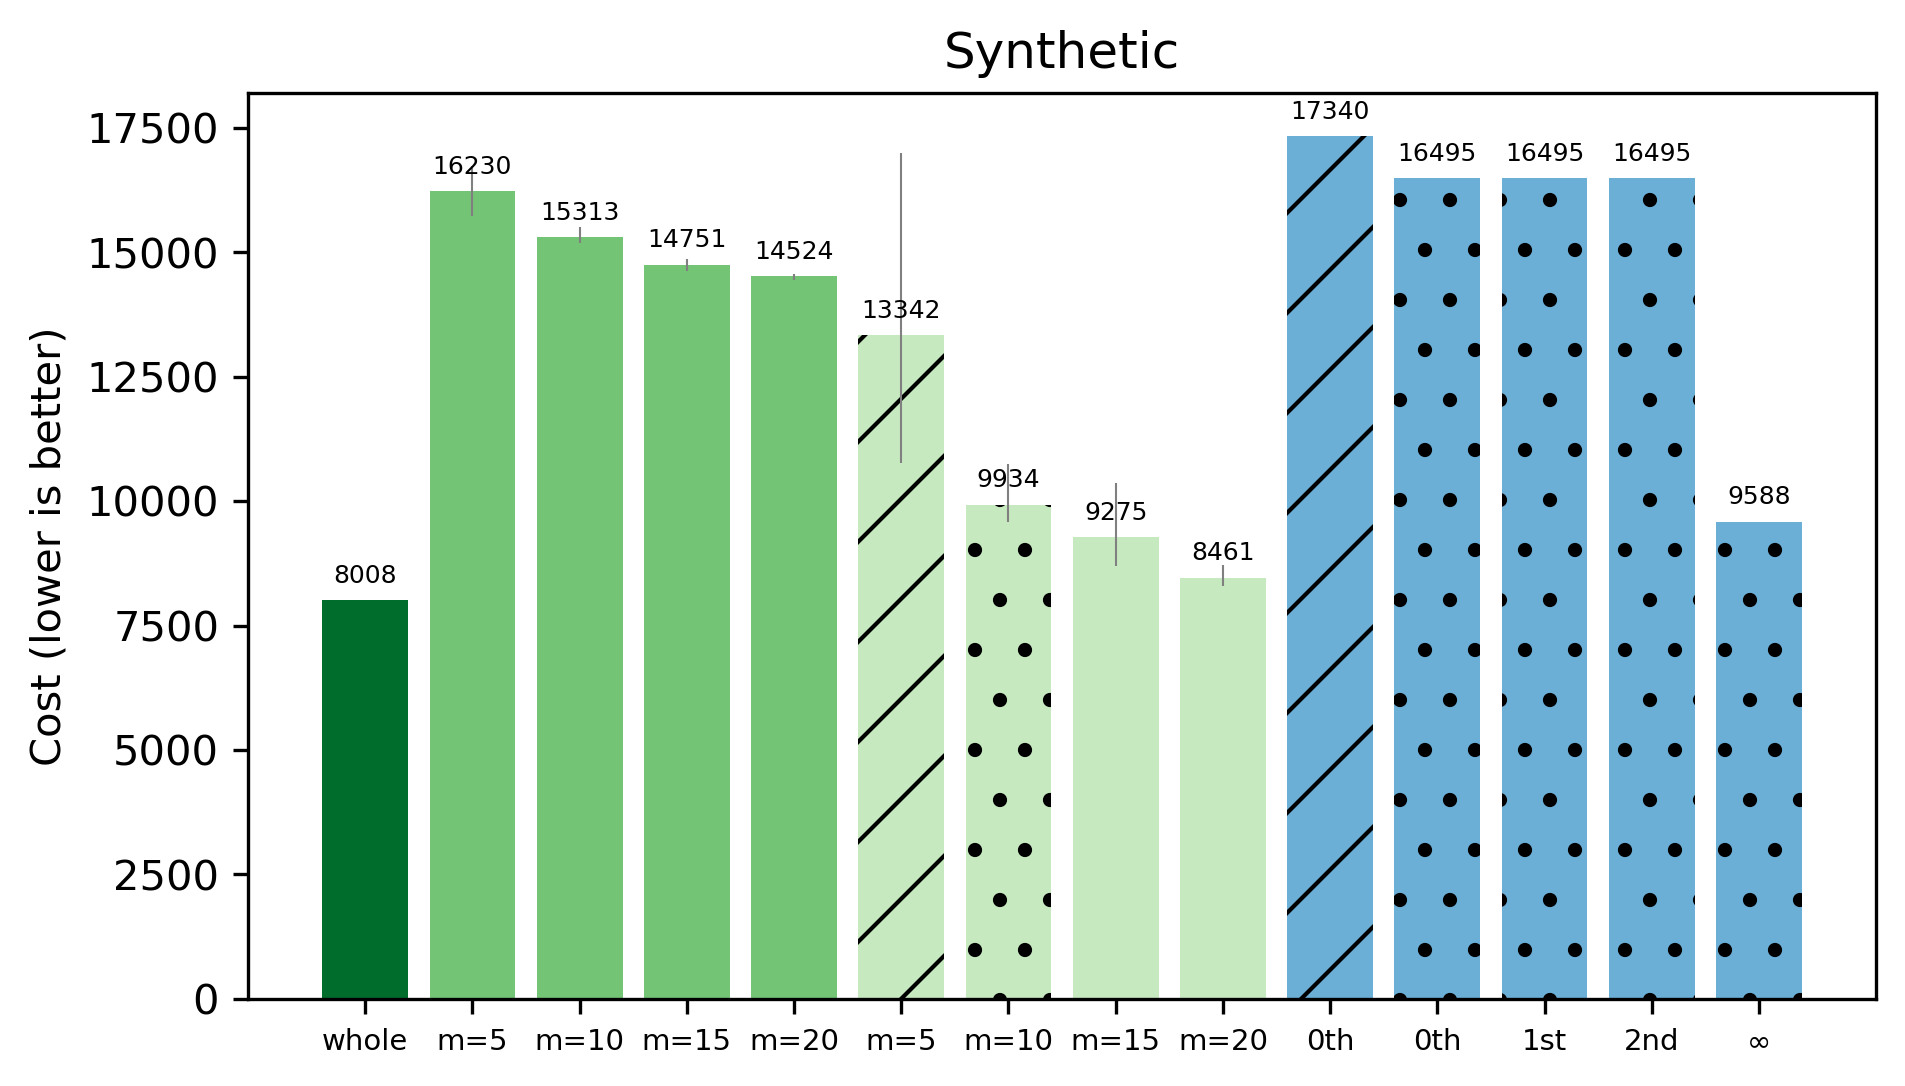

In [33]:
x = np.arange(14)
costs = [cost_whole, np.mean(cost_5_random_list), np.mean(cost_10_random_list), np.mean(cost_20_random_list), np.mean(cost_40_random_list),
         np.mean(cost_5_coreset_list), np.mean(cost_10_coreset_list), np.mean(cost_20_coreset_list), np.mean(cost_40_coreset_list),
         qaoa_bound_zero_5, qaoa_bound_zero_10, qaoa_bound_first_10, qaoa_bound_second_10, qaoa_bound_inf_10]
scale = 0

yerr = [[0, np.mean(cost_5_random_list) - np.min(cost_5_random_list), np.mean(cost_10_random_list) - np.min(cost_10_random_list), np.mean(cost_20_random_list) - np.min(cost_20_random_list), np.mean(cost_40_random_list) - np.min(cost_40_random_list), np.mean(cost_5_coreset_list) - np.min(cost_5_coreset_list), np.mean(cost_10_coreset_list) - np.min(cost_10_coreset_list), np.mean(cost_20_coreset_list) - np.min(cost_20_coreset_list), np.mean(cost_40_coreset_list) - np.min(cost_40_coreset_list), 0, 0, 0, 0, 0],
        [0, np.max(cost_5_random_list) - np.mean(cost_5_random_list), np.max(cost_10_random_list) - np.mean(cost_10_random_list), np.max(cost_20_random_list) - np.mean(cost_20_random_list), np.max(cost_40_random_list) - np.mean(cost_40_random_list), np.max(cost_5_coreset_list) - np.mean(cost_5_coreset_list), np.max(cost_10_coreset_list) - np.mean(cost_10_coreset_list), np.max(cost_20_coreset_list) - np.mean(cost_20_coreset_list), np.max(cost_40_coreset_list) - np.mean(cost_40_coreset_list), 0, 0, 0, 0, 0]]


labels = ['whole', 'm=5', 'm=10', 'm=15', 'm=20', 'm=5', 'm=10', 'm=15', 'm=20', '0th', '0th', '1st', '2nd', u"\u221E"]
color = ['#006d2c', '#74c476', '#74c476', '#74c476', '#74c476', '#c7e9c0', '#c7e9c0', '#c7e9c0', '#c7e9c0', '#6baed6', '#6baed6', '#6baed6', '#6baed6', '#6baed6']
hatch=['', '', '', '', '', '/', '.', '', '', '/', '.', '.', '.', '.']


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height() / (10 ** scale)
        ax.annotate('{0:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height * (10 ** scale)),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=6)


fig, ax = plt.subplots(figsize=(7, 4), dpi=300)
for i in range(len(x)):
    rects = ax.bar(x[i], costs[i], label=labels[i], color=color[i], hatch=hatch[i],
                   yerr=[[yerr[0][i]], [yerr[1][i]]], error_kw={'elinewidth': 0.5, 'ecolor':'gray'})
    autolabel(rects)

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=7)
ax.set_ylabel('Cost (lower is better)')
ax.set_title('Synthetic')

plt.savefig('synthetic.pdf')

In [34]:
best_index = cost_5_coreset_list.index(np.min(cost_5_coreset_list))
np.save('synthetic_coreset_vectors.npy', coreset_vectors_5_list[best_index])
np.save('synthetic_coreset_weights.npy', coreset_weights_5_list[best_index])